# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [25]:
# Dependencies and Setup
import json
import pprint as pp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 617


In [26]:
rept = requests.get(f"https://api.openweathermap.org/data/2.5/weather?lat=20&lon=15&appid={weather_api_key}").json()
rept

{'coord': {'lon': 15, 'lat': 20},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 289.47,
  'feels_like': 287.81,
  'temp_min': 289.47,
  'temp_max': 289.47,
  'pressure': 1018,
  'humidity': 25,
  'sea_level': 1018,
  'grnd_level': 961},
 'visibility': 10000,
 'wind': {'speed': 2.63, 'deg': 340, 'gust': 2.71},
 'clouds': {'all': 1},
 'dt': 1702595250,
 'sys': {'sunrise': 1702618025, 'sunset': 1702657374},
 'timezone': 3600,
 'id': 0,
 'name': '',
 'cod': 200}

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [27]:
# Set the API base URL

city = ""

url2 = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=5&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city  
  
    geolo = requests.get(f"http://api.openweathermap.org/geo/1.0/direct?q={city}&appid={weather_api_key}").json()
    if geolo != []:
        lat = geolo[0]["lat"]
        lon = geolo[0]["lon"]

        city_url =  f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}"

    

    # Log the url, record, and set numbers
    
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities   this where i cut 

    city_rep = requests.get(city_url).json()

    try:
    # Parse the JSON and retrieve data
        city_weather = city_rep["weather"] 

    # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_rep["coord"]["lat"]
        city_lng = city_rep["coord"]["lon"]
        city_max_temp = city_rep["main"]["temp_max"]
        city_humidity = city_rep["main"]["humidity"]
        city_clouds = city_rep["clouds"]["all"]
        city_wind = city_rep["wind"]["speed"]
        city_country = geolo[0]["country"]
        city_date = city_rep["dt"]

    # Append the City information into city_data list
        city_data.append({"City": city, 
                           "Lat": city_lat, 
                           "Lng": city_lng, 
                           "Max Temp": city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind,
                           "Country": city_country,
                           "Date": city_date})

    # # If an error is experienced, skip the city
    except:
         print("City not found. Skipping...")
         pass
    
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | gurupa
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | kitui
Processing Record 5 of Set 1 | inarajan village
City not found. Skipping...
Processing Record 6 of Set 1 | candido de abreu
Processing Record 7 of Set 1 | minas de marcona
City not found. Skipping...
Processing Record 8 of Set 1 | olingan
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | mugia
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | qaqortoq
Processing Record 17 of Set 1 | uturoa
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | lorengau
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | hawaiian paradise 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [6]:
# Display sample data

# Converts temp to celcius 
city_data_df["Max Temp"] = city_data_df["Max Temp"] - 273.15

city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-35.2705,174.0805,20.87,76,42,2.31,NZ,1702592950
1,gurupa,-1.4063,-51.6427,28.78,65,69,1.34,BR,1702592951
2,port alfred,-33.5982,26.8915,17.42,82,20,3.81,ZA,1702592952
3,kitui,-1.3666,38.0166,17.94,90,66,0.89,KE,1702592953
4,candido de abreu,-24.5747,-51.3432,25.27,75,45,0.81,BR,1702592460


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-35.2705,174.0805,20.87,76,42,2.31,NZ,1702592950
1,gurupa,-1.4063,-51.6427,28.78,65,69,1.34,BR,1702592951
2,port alfred,-33.5982,26.8915,17.42,82,20,3.81,ZA,1702592952
3,kitui,-1.3666,38.0166,17.94,90,66,0.89,KE,1702592953
4,candido de abreu,-24.5747,-51.3432,25.27,75,45,0.81,BR,1702592460


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

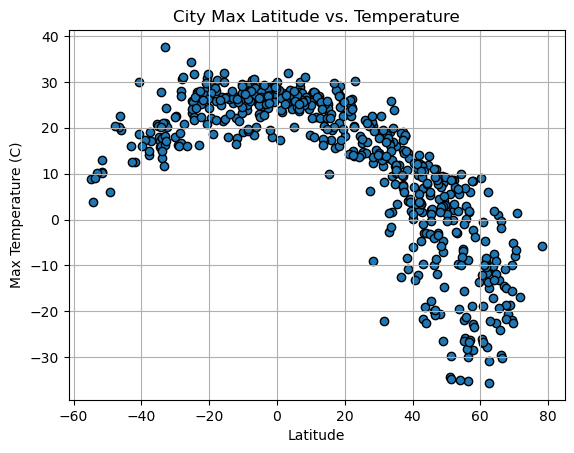

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors = 'black')


# Incorporate the other graph properties
# YOUR CODE HERE

plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

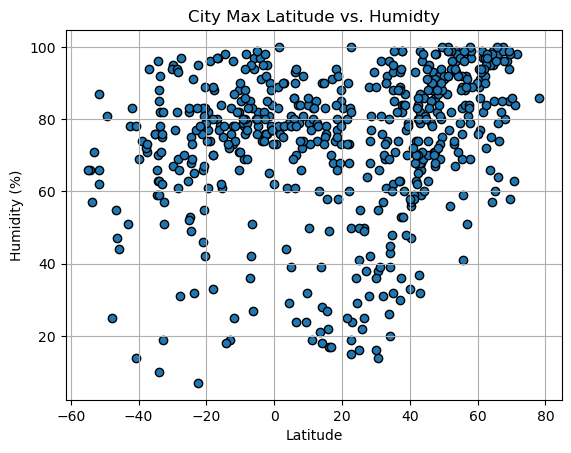

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors = 'black')

# Incorporate the other graph properties
# YOUR CODE HERE

plt.title("City Max Latitude vs. Humidty")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

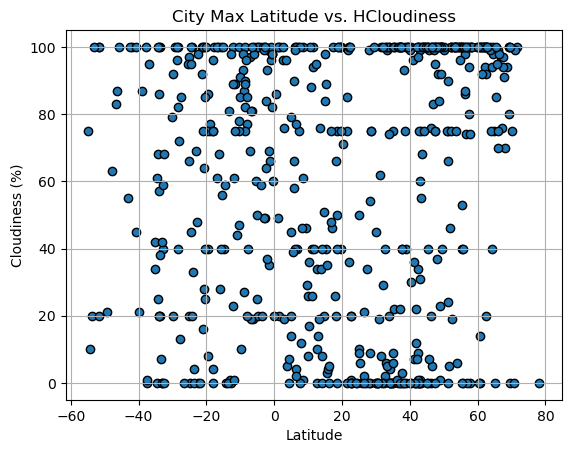

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors = 'black')

# Incorporate the other graph properties
# YOUR CODE HERE

plt.title("City Max Latitude vs. HCloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

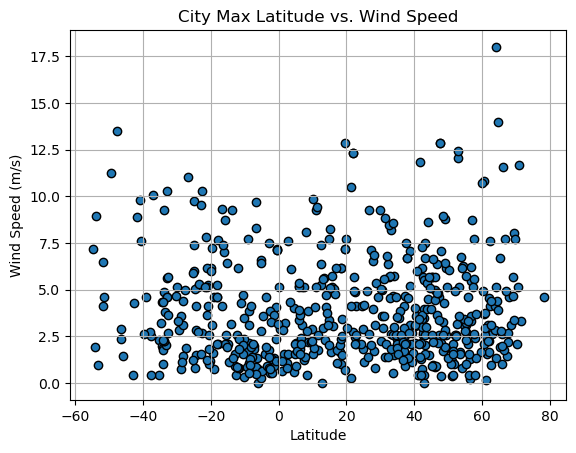

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors = 'black')

# Incorporate the other graph properties
# YOUR CODE HERE

plt.title("City Max Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linReg(x, y):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")

    return line_eq
    

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,olingan,8.5382,123.3201,25.11,92,61,2.20,PH,1702592957
9,hilo,19.7074,-155.0816,22.80,85,100,7.20,US,1702592962
11,mugia,43.1071,-9.2182,11.57,82,60,2.03,ES,1702592964
12,tiksi,71.6366,128.8685,-16.87,98,100,3.30,RU,1702592965
13,qaqortoq,60.7182,-46.0385,-18.75,77,14,3.70,GL,1702592967


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-35.2705,174.0805,20.87,76,42,2.31,NZ,1702592950
1,gurupa,-1.4063,-51.6427,28.78,65,69,1.34,BR,1702592951
2,port alfred,-33.5982,26.8915,17.42,82,20,3.81,ZA,1702592952
3,kitui,-1.3666,38.0166,17.94,90,66,0.89,KE,1702592953
4,candido de abreu,-24.5747,-51.3432,25.27,75,45,0.81,BR,1702592460


###  Temperature vs. Latitude Linear Regression Plot

Text(5.8, -35, 'y = -0.71x + 33.12')

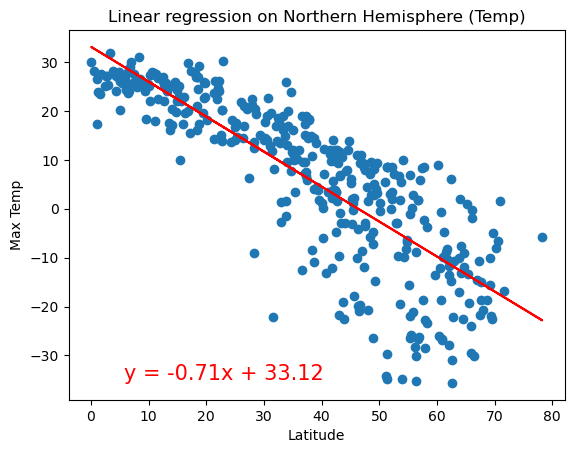

In [16]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

plt.title("Linear regression on Northern Hemisphere (Temp)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# The function returns a string of the equation 

plt.annotate(linReg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"]),(5.8,-35),fontsize=15,color="red")

Text(-40, 6, 'y = 0.26x + 28.75')

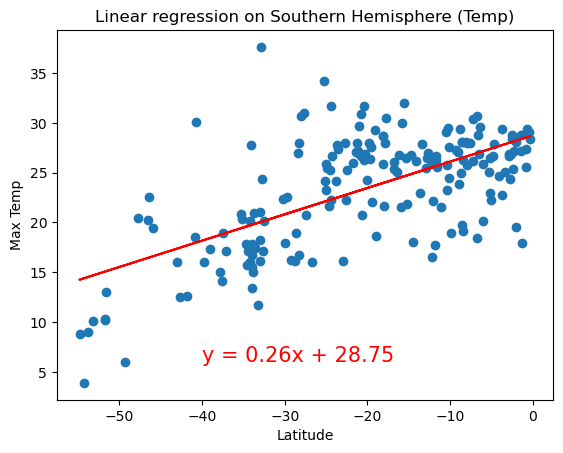

In [17]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

plt.title("Linear regression on Southern Hemisphere (Temp)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(linReg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"]),(-40, 6),fontsize=15,color="red")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Text(42, 20, 'y = 0.38x + 60.11')

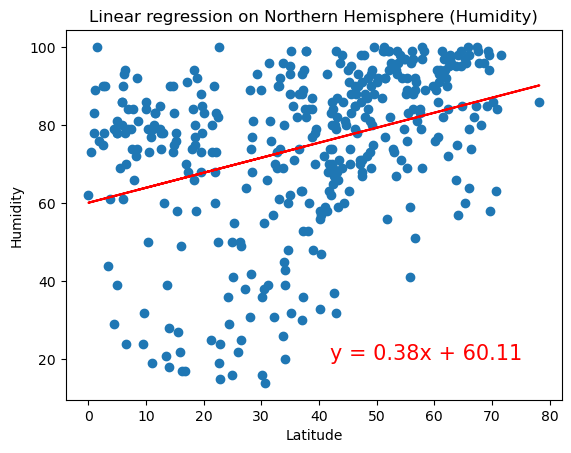

In [18]:
# Northern Hemisphere
# YOUR CODE HERE

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

plt.title("Linear regression on Northern Hemisphere (Humidity)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# The function returns a string of the equation 

plt.annotate(linReg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"]),(42,20),fontsize=15,color="red")


Text(-50, 20, 'y = 0.36x + 80.18')

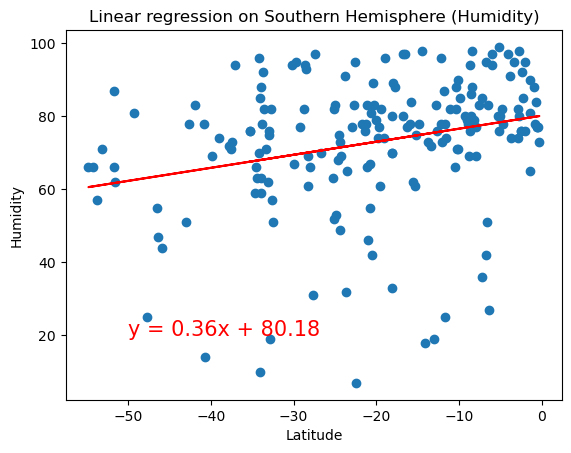

In [19]:
# Southern Hemisphere
# YOUR CODE HERE

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

plt.title("Linear regression on Southern Hemisphere (Humidity)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(linReg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"]),(-50, 20),fontsize=15,color="red")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Text(42, 20, 'y = 0.58x + 36.63')

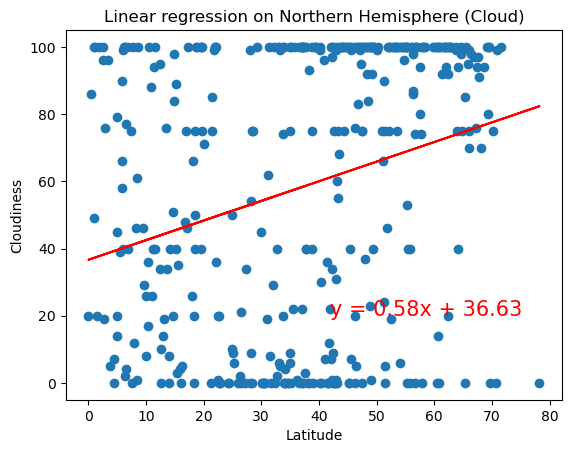

In [20]:
# Northern Hemisphere
# YOUR CODE HERE

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

plt.title("Linear regression on Northern Hemisphere (Cloud)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# The function returns a string of the equation 

plt.annotate(linReg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"]),(42,20),fontsize=15,color="red")

Text(-50, 20, 'y = 0.39x + 70.23')

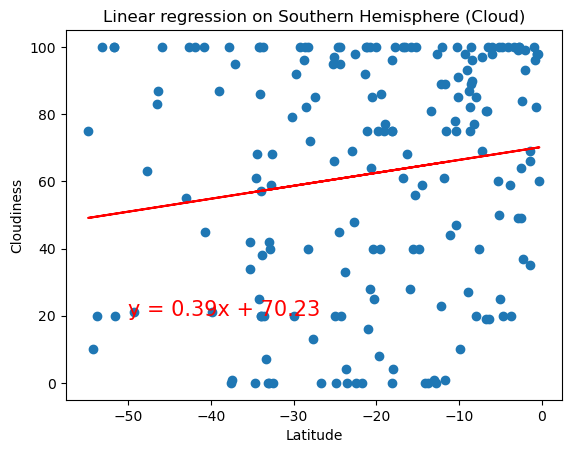

In [21]:
# Southern Hemisphere
# YOUR CODE HERE

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

plt.title("Linear regression on Southern Hemisphere (Cloud)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(linReg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"]),(-50, 20),fontsize=15,color="red")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Text(10, 12, 'y = 0.01x + 3.59')

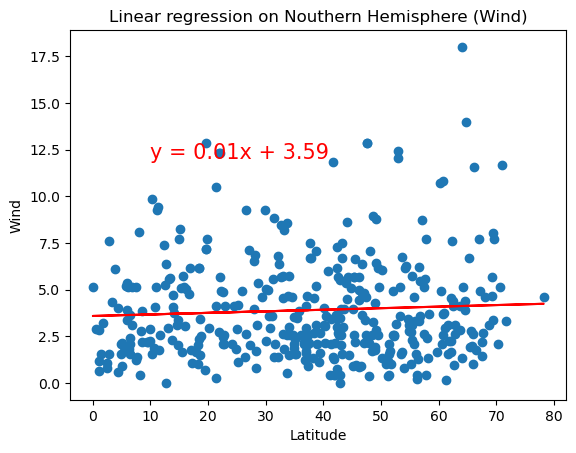

In [24]:
# Northern Hemisphere
# YOUR CODE HERE

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

plt.title("Linear regression on Nouthern Hemisphere (Wind)")
plt.xlabel("Latitude")
plt.ylabel("Wind")
plt.annotate(linReg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"]),(10, 12),fontsize=15,color="red")

Text(-50, 10, 'y = -0.05x + 2.64')

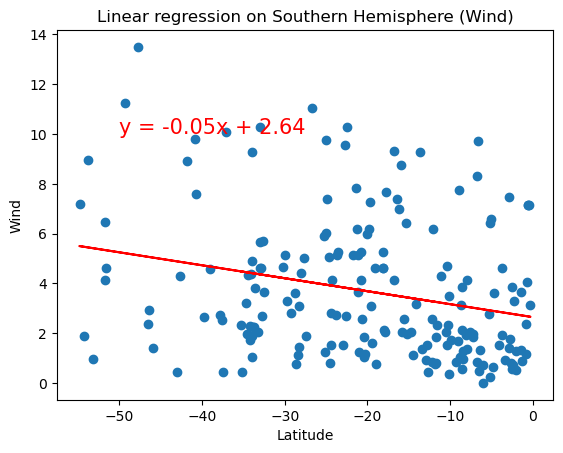

In [23]:
# Southern Hemisphere
# YOUR CODE HERE

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

plt.title("Linear regression on Southern Hemisphere (Wind)")
plt.xlabel("Latitude")
plt.ylabel("Wind")
plt.annotate(linReg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"]),(-50, 10),fontsize=15,color="red")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

#When looking at the latitudinal relationship between specific weather traits. I notice soem trends described below.
 
#Temperature: At this current time of examination. Southern latitudes are experiencing warmer temps compared to the north.
    #Which is also  shown in the North and south break down.
 
#Humidity: The plots of the north and south show that Humidty in the north is going up as it moves northward and goes down and it moves south ward.
    #It also shows that humidity is going up with colder weather and goind down with warmer weather. 

#Cloudyness: I cannot conclude any clear trends as it relate to cloudiness. 

#Wind: Win speeds are trending up in the northern sector and trending down in the south. Therefore we can tie higher wind speeds with warmer colder and lower with warmer temps.  